<a href="https://colab.research.google.com/github/Sharekh1/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Mahmoud Abusharekh

## Project Overview


This project focuses on predicting sales of food items at various stores

## Imports

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Inspect Data


In [4]:
fname = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean data

### How many rows and columns?

In [6]:
df.shape

(8523, 12)

- There are 8523 rows and 12 columns

### Checking the data types:



In [7]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


### Duplicated Data

Checking for duplicated data:



In [8]:
df.duplicated(keep = False).sum()

np.int64(0)

- This means there are no duplicated rows in our dataset.

## Missing Values


Checking for missing values:



In [9]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Identifying % of missing data (optional)

In [10]:
(df.isna().sum() / len(df) * 100).round(2)

,0
Item_Identifier,0.00
Item_Weight,17.17
Item_Fat_Content,0.00
Item_Visibility,0.00
Item_Type,0.00
Item_MRP,0.00
Outlet_Identifier,0.00
Outlet_Establishment_Year,0.00
Outlet_Size,28.28
Outlet_Location_Type,0.00


- Missing Values:
  - There are 1463 missing values in the **Item_Weight** column. (17.17%)
  - There are 2410 missing values in the **Outlet_Size** column. (28.28%)


## Handling Missing Values


### Addressing Nulls in Categorical Features

In [11]:
# Using fillna to fill Outlet_Size's nulls with "MISSING"
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size'].value_counts(dropna=False) # dropna=False -> Ensures NaN values are included in the count.

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


Result:

The missing values in the Outlet_Size column were successfully replaced with `MISSING`.

### Addressing Nulls in Numeric Features

In [12]:
# Create a filter for null values in Item_Weight
null_Item_Weight = df['Item_Weight'].isna()
# Use the filter to display only the rows with null values in Item_Weight
df[null_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In this step, we identified all the rows in the dataset where the `Item_Weight` column contains missing values.
A filter was created to locate these rows, and then we displayed them to better understand the missing data.

This helps us determine how many records are affected and prepare for the next steps in handling these missing values.

#### Obtain summary statistics for the Item_Weight


In [13]:
df['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


The summary gives us a better understanding of the distribution of item weights and will help decide how to handle missing values appropriately.

#### Handling Missing Values in Item_Weight


In [14]:
# Filling null values with -1
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

np.int64(0)

Result:

All missing values in the Item_Weight column have been successfully filled with -1.

#### Confirm that there are no missing values

In [15]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Result:

All missing values in the dataset have been successfully handled.

## Inspecting Categorical Columns & Addressing Inconsistent Values

We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.


#### Identify string columns


In [16]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

After carefully reviewing the entire output, we identified only one column that requires further investigation: `Item_Fat_Content`.

#### Let's review the Item_Fat_Content column:

In [18]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


Handling Inconsistent Values in `Item_Fat_Content`

Upon reviewing the unique values in the **`Item_Fat_Content`** column, we noticed inconsistencies in naming.  
For example:
- `"Low Fat"`, `"LF"`, and `"low fat"` represent the same category.
- `"Regular"` and `"reg"` also represent the same category.

To clean the data, we will standardize these values into two consistent categories:  
**"Low Fat"** and **"Regular"**.

In [19]:
# Standardize inconsistent values in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Result

The inconsistent values in the **`Item_Fat_Content`** column have been successfully standardized.  
Now, the column contains only **two unique categories**: **"Low Fat"** and **"Regular"**, making it clean and consistent for analysis.

#### In this step, we will obtain the **summary statistics** for all numerical columns in the dataset.  
This will include:
- **Count** → Number of non-null values  
- **Mean** → Average value  
- **Standard Deviation (std)** → Spread of the data  
- **Min & Max** → Minimum and maximum values  
- **Quartiles (25%, 50%, 75%)** → Useful to understand data distribution.

In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Result

The output provides an overview of all **numerical columns** in the dataset, including their:
- **Minimum** and **Maximum** values to identify the data range.
- **Mean** to understand the central tendency.
- **Standard Deviation** to measure variability.
- **Quartiles (25%, 50%, 75%)** to analyze data distribution.

These statistics are useful for detecting outliers and understanding the overall spread of numerical data.

### Ignore all warnings

In [32]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

Now that the dataset is cleaned and preprocessed, the next step is to **explore our categorical variables**.  
Understanding the distribution of categories helps us answer questions like:  

- Which product types dominate the assortment?  
- What outlet types and sizes make up most of the business footprint?  
- Are there any missing values or underrepresented categories we should handle carefully in modeling?  

The categorical features we will examine are:  
- `Item_Fat_Content` → whether the product is Low Fat or Regular  
- `Outlet_Type` → type of store (Supermarket or Grocery Store)  
- `Outlet_Size` → size of the outlet (Small, Medium, High, or Missing)  
- `Item_Type` → product category (e.g., Fruits, Dairy, Snack Foods)  

We will create **count plots** for each of these features to visualize their distribution.  
This will give us a clearer picture of the portfolio composition and the store footprint, which are critical for both business insights and predictive modeling.


Column: Item_Fat_Content
- NaN's Found: 0 (0.0%)
- Unique Values (including NaN): 2
- Most common value: Low Fat

Column: Outlet_Type
- NaN's Found: 0 (0.0%)
- Unique Values (including NaN): 4
- Most common value: Supermarket Type1

Column: Outlet_Size
- NaN's Found: 0 (0.0%)
- Unique Values (including NaN): 4
- Most common value: Medium

Column: Item_Type
- NaN's Found: 0 (0.0%)
- Unique Values (including NaN): 16
- Most common value: Fruits and Vegetables


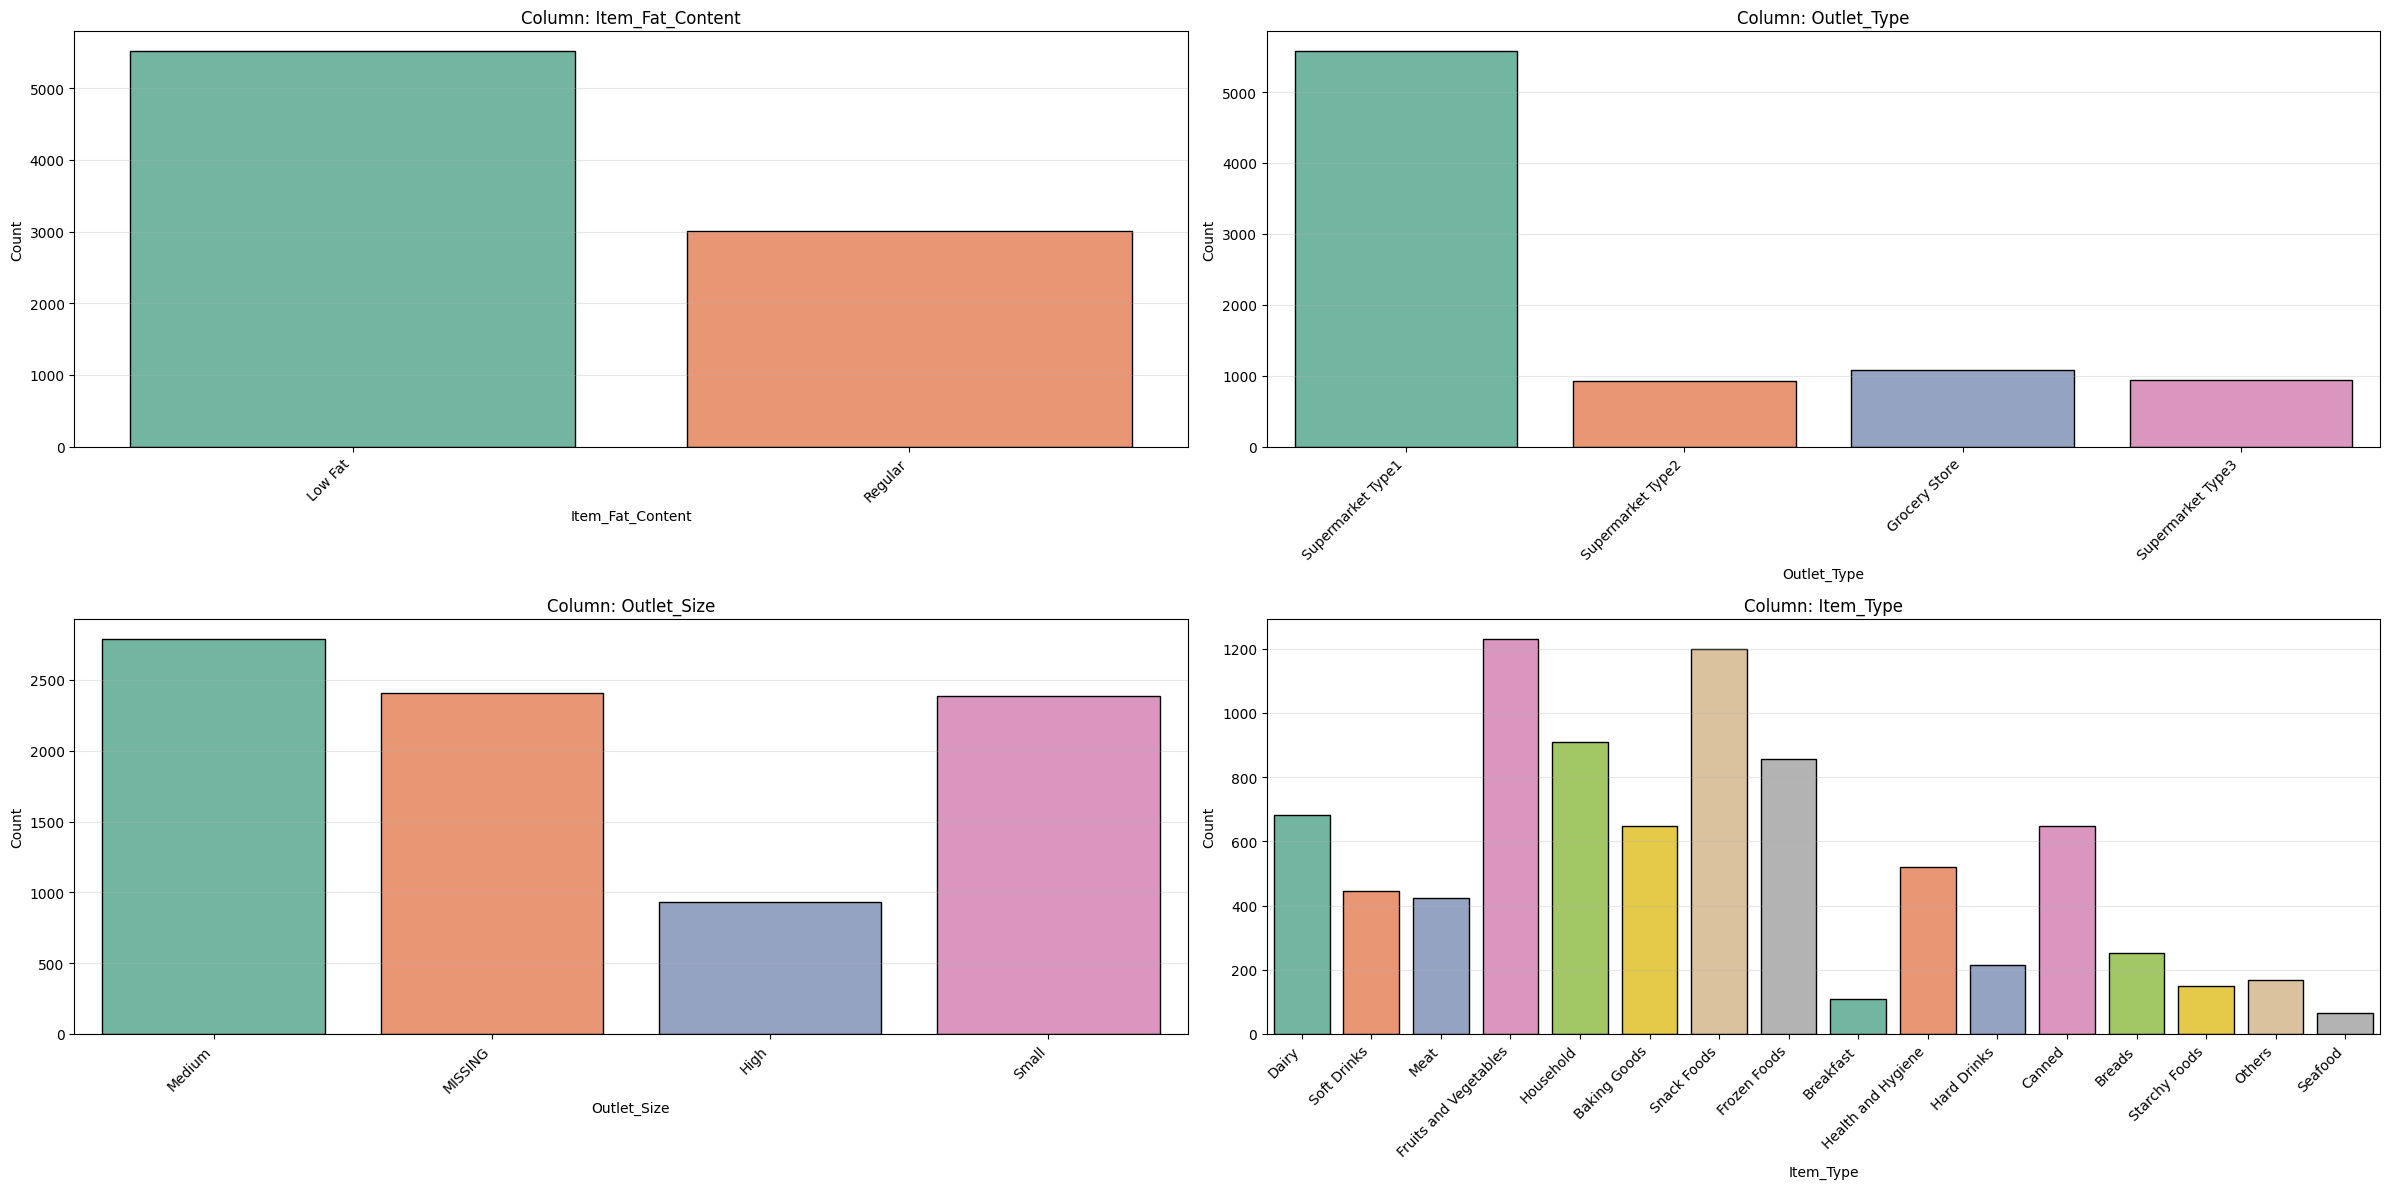

In [78]:
import math

cols = ["Item_Fat_Content", "Outlet_Type", "Outlet_Size", "Item_Type"]

palette = "Set2"
col_wrap = 2  # number of plots per row

n = len(cols)
rows = math.ceil(n / col_wrap)
fig, axes = plt.subplots(rows, col_wrap, figsize=(24, 6*rows))

# Flatten axes to make indexing easier
axes = axes.flatten()

for i in range(n):
    col = cols[i]

    # Drop NaNs for plotting only
    temp = df[df[col].notna()]

    sns.countplot(data=temp, x=col, ax=axes[i], palette=palette, edgecolor="black")
    axes[i].set_title(f"Column: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
    axes[i].grid(True, axis="y", alpha=0.3)

    # Print stats from original df
    null_count = df[col].isna().sum()
    null_perc = round(null_count / len(df) * 100, 2)
    nunique = df[col].nunique(dropna=False)
    print(f"\nColumn: {col}")
    print(f"- NaN's Found: {null_count} ({null_perc}%)")
    print(f"- Unique Values (including NaN): {nunique}")
    print(f"- Most common value: {df[col].mode()[0]}")

# Hide any unused subplot axes
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()

### Distribution of Key Categorical Variables

**Plot summary:**
- **Item_Fat_Content:** Low Fat `65%` vs Regular `35%`.  
- **Outlet_Type:** Dominated by Supermarket Type 1 `65% of outlets`.  
- **Outlet_Size:** Most are Medium, then Small; `25–30%` are MISSING.  
- **Item_Type:** Diverse mix; top categories = Fruits & Vegetables, Snack Foods, Household, Frozen Foods, Dairy.  

**Interpretation:**
- Business footprint is mainly **Medium-sized, Supermarket Type 1 outlets**.  
- Product portfolio leans strongly to “Low Fat.”  
- Data quality issue: Outlet_Size has many missing entries.  
- Wide product variety, but sales likely concentrated in top categories.  

**Recommendations:**
- **Merchandising:** Expand “Low Fat” and prioritize top categories.  
- **Store Strategy:** Optimize for core format (Supermarket Type 1, Medium).  
- **Marketing:** Target health-conscious demand; bundle niche categories.  
- **Data Science:** Group small categories; handle missing Outlet_Size carefully.

### ECDF of Item Outlet Sales by Outlet Type

To gain a deeper understanding of sales distribution across different outlet formats,  
we use an **Empirical Cumulative Distribution Function (ECDF) plot**.  

Unlike histograms or boxplots, an ECDF shows the **cumulative proportion** of data points below a given value.  
This allows us to clearly see:  
- What percentage of outlets achieve sales below a specific threshold  
- How sales distributions differ between **Supermarket Types** and **Grocery Stores**  
- Whether some outlet types consistently deliver higher sales than others  

This is a less common but highly informative plot, helping us compare distributions across groups in a single chart.

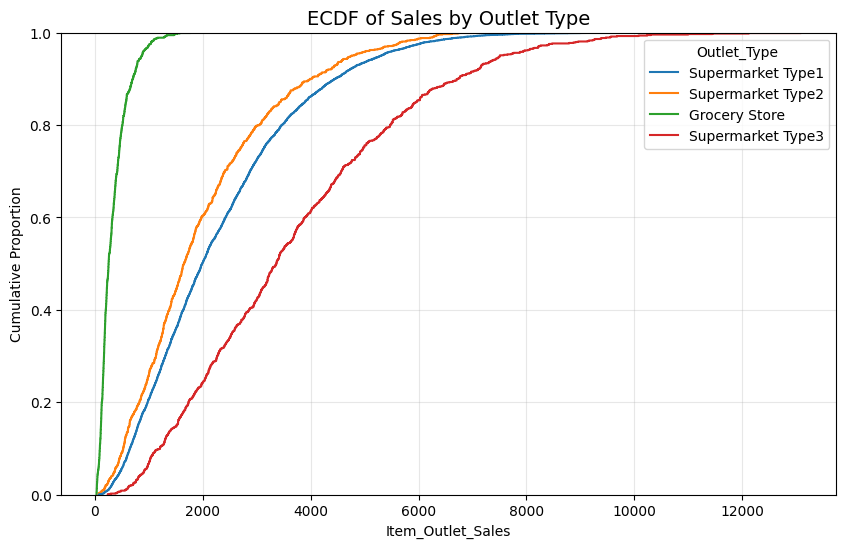

In [81]:
plt.figure(figsize=(10,6))
sns.ecdfplot(data=df, x="Item_Outlet_Sales", hue="Outlet_Type")
plt.title("ECDF of Sales by Outlet Type", fontsize=14)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Cumulative Proportion")
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation of the ECDF plot:**

- **Grocery Stores** (green line) reach 100% cumulative proportion at very low sales values →  
  meaning they consistently deliver **much lower sales** compared to supermarkets.  

- **Supermarket Type 1 and Type 2** (blue and orange) have similar sales distributions,  
  with the majority of their items selling below 4000 but with some higher-performing outliers.  

- **Supermarket Type 3** (red line) shows the **widest spread of sales**,  
  with a longer right tail, indicating some items achieve very high sales compared to other outlet types.  

**Key takeaways for stakeholders:**
- Grocery stores are low performers → optimize them for **essentials and high-velocity SKUs** only.  
- Supermarket Types 1 & 2 are more consistent → ideal channels for **mainstream promotions**.  
- Supermarket Type 3 outlets, despite being fewer, show potential for **hero products and premium sales strategies**.  

This analysis confirms that **store format is a major driver of sales performance** and should guide assortment and marketing strategies.